In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [15]:
data = pd.read_csv("housing.csv")

In [16]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10610,-117.78,33.68,11.0,1994.0,477.0,849.0,411.0,4.0187,<1H OCEAN,235600.0
13000,-121.26,38.67,18.0,1830.0,313.0,905.0,361.0,4.2273,INLAND,141800.0
15351,-117.30,33.25,22.0,2329.0,419.0,1456.0,381.0,3.7933,<1H OCEAN,131000.0
13094,-121.36,38.56,20.0,1232.0,332.0,667.0,288.0,1.8288,INLAND,32500.0
3229,-119.64,36.31,27.0,1513.0,314.0,1071.0,284.0,1.5909,INLAND,50100.0
...,...,...,...,...,...,...,...,...,...,...
15689,-122.43,37.79,52.0,6186.0,1566.0,2065.0,1374.0,5.8543,NEAR BAY,500001.0
19684,-121.62,39.14,41.0,2183.0,559.0,1202.0,506.0,1.6902,INLAND,61500.0
7751,-118.15,33.92,28.0,1038.0,252.0,912.0,245.0,2.5875,<1H OCEAN,161200.0
7414,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,<1H OCEAN,152800.0


In [20]:
train_data = X_train.join(y_train) # the result of this only shows the result of the training data



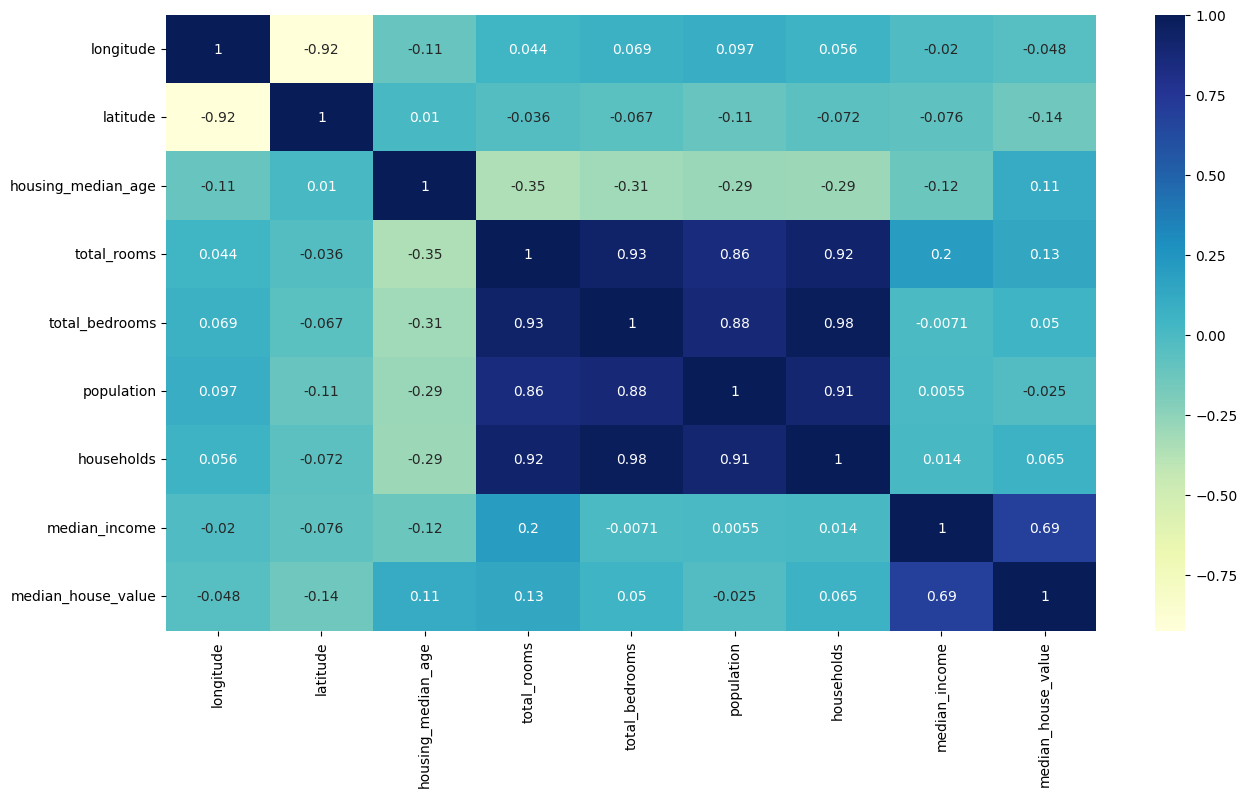

In [21]:
train_data_numeric = train_data.drop(columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()
#======= END OF DATA EXPLORATION ========#

In [22]:
# GOAL to convert the categorical data on column (ocean_proximity) to binary
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
# train_data = train_data.join(category_vars)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10610,-117.78,33.68,11.0,1994.0,477.0,849.0,411.0,4.0187,235600.0,True,False,False,False,False
13000,-121.26,38.67,18.0,1830.0,313.0,905.0,361.0,4.2273,141800.0,False,True,False,False,False
15351,-117.30,33.25,22.0,2329.0,419.0,1456.0,381.0,3.7933,131000.0,True,False,False,False,False
13094,-121.36,38.56,20.0,1232.0,332.0,667.0,288.0,1.8288,32500.0,False,True,False,False,False
3229,-119.64,36.31,27.0,1513.0,314.0,1071.0,284.0,1.5909,50100.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15689,-122.43,37.79,52.0,6186.0,1566.0,2065.0,1374.0,5.8543,500001.0,False,False,False,True,False
19684,-121.62,39.14,41.0,2183.0,559.0,1202.0,506.0,1.6902,61500.0,False,True,False,False,False
7751,-118.15,33.92,28.0,1038.0,252.0,912.0,245.0,2.5875,161200.0,True,False,False,False,False
7414,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,152800.0,True,False,False,False,False


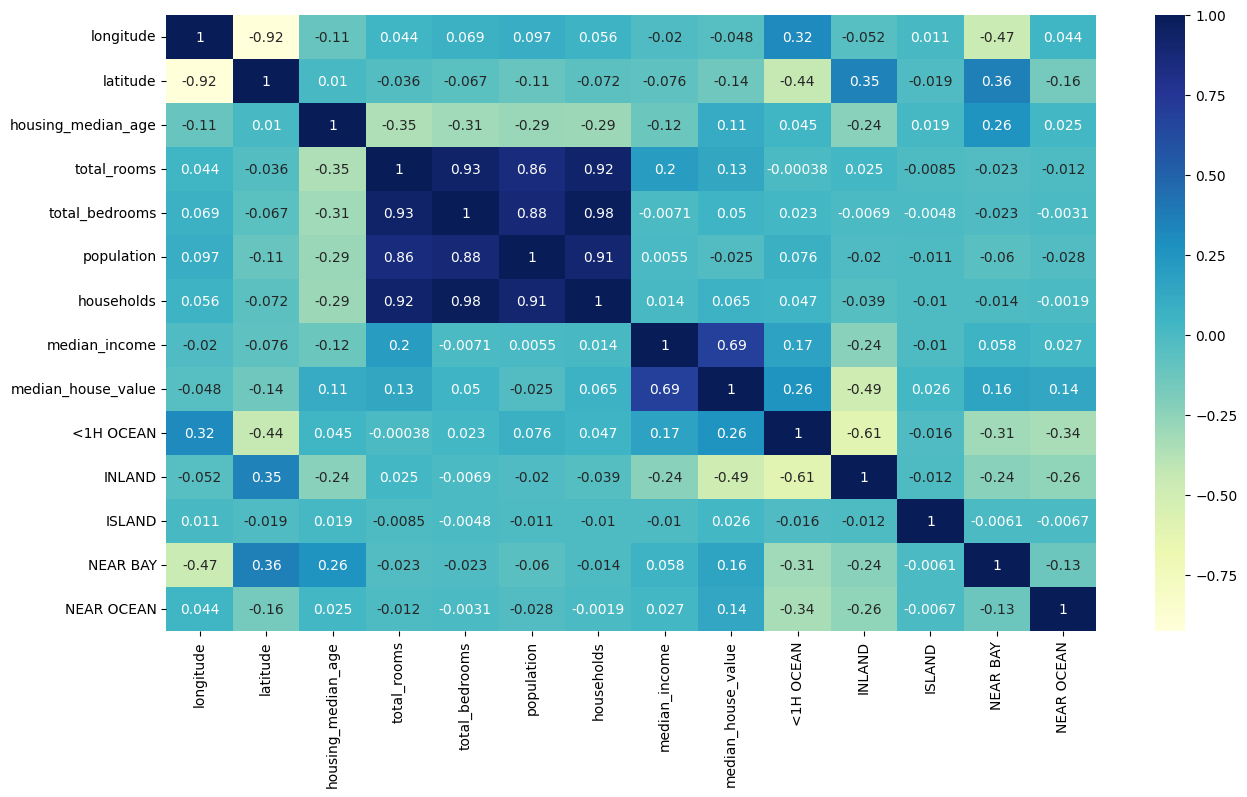

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

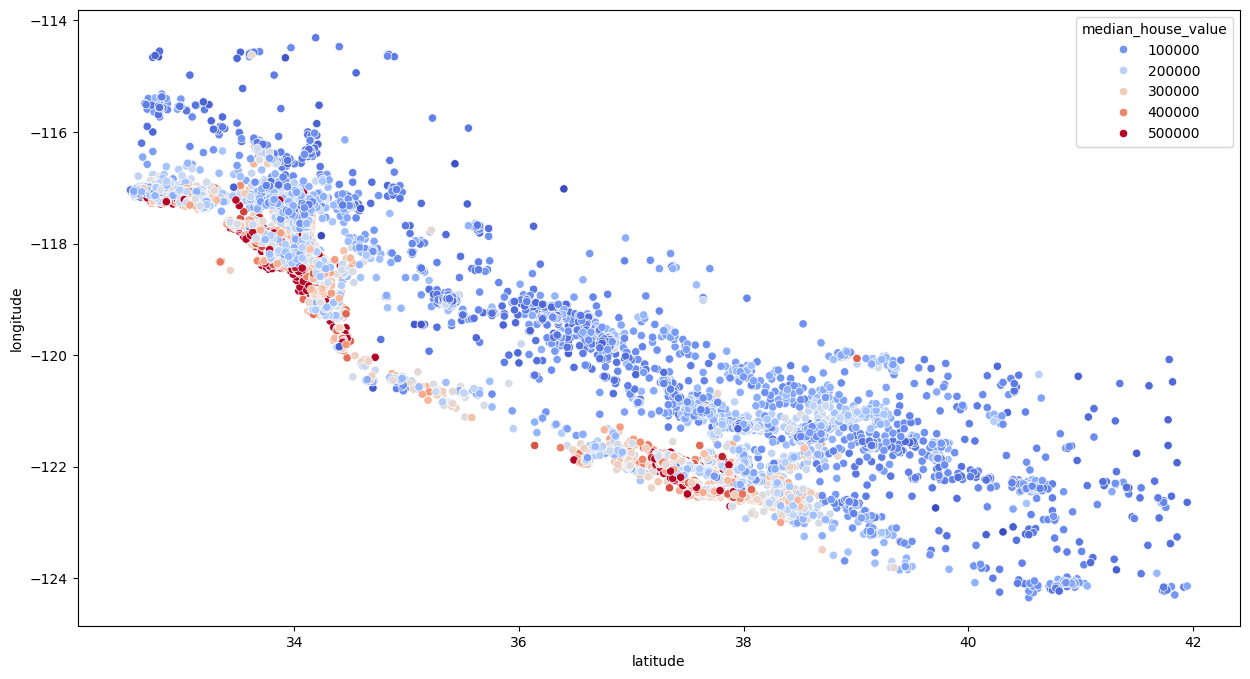

In [24]:
# Visualise the data on scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data.latitude, y=train_data.longitude, hue=train_data.median_house_value, palette="coolwarm")

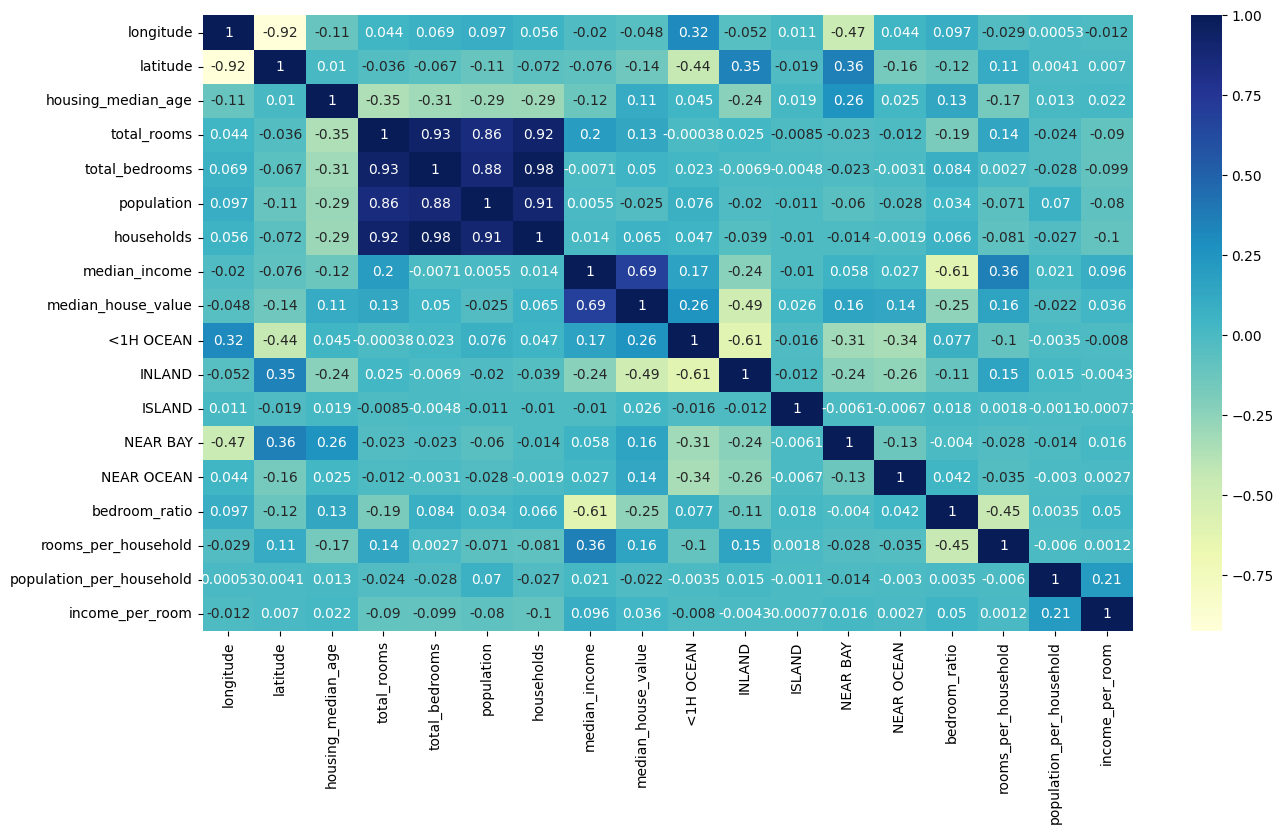

In [25]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['income_per_room'] = train_data['median_income'] / train_data['total_rooms']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [30]:


X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

model = LinearRegression()

model.fit(X_train, y_train)

test_data = X_train.join(y_test)
# test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']
test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['income_per_room'] = test_data['median_income'] / test_data['total_rooms']

X_test, y_test = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

model.score(X_test, y_test)



0.6563080545705375